# Descripción del ejercicio:
##  Sobreventa de tiquetes aéreos considerando diferentes categorías de tarifas

#### Importando la librería creada

In [1]:
from Libreria.simulator import *
import statistics

#### Creando función para recrear la distribución "pert"

In [2]:
def pert(a, b, c, *, size=1, lamb=4):
    r = c - a
    alpha = 1 + lamb * (b - a) / r
    beta = 1 + lamb * (c - b) / r
    return a + np.random.beta(alpha, beta, size=size) * r

In [3]:
def varibles_entrada():

    return {"sillas_disponibles":150,
            "precio_competencia_tarifa":np.random.normal(loc=180,scale=55),
            "precio_tiquete_tarifa":195,
            "porcentaje_ausencias_tarifa":np.random.normal(loc=0.2 ,scale=0.03),
            "demanda_reservaciones_tarifa":np.round(pert(23,55,118),0),
            "precio_competencia_descontada":np.random.normal(loc=80 ,scale=28),
            "precio_tiquete_descontada":85,
            "porcentaje_ausencias_descontada":np.random.normal(loc=0.1 ,scale=0.01),
            "demanda_reservaciones_descontada":pert(80,140,210),
            "sillas_ofrecidas_venta":np.random.randint(150,236),
            "porcentaje_venta_tarifa":np.random.randint(20,100),
            "costo_unitario_pas_tierra":statistics._normal_dist_inv_cdf(random.random(),170,30)}

In [4]:
def sobreventa_tiquetes(sillas_disponibles,precio_competencia_tarifa,precio_tiquete_tarifa,porcentaje_ausencias_tarifa,demanda_reservaciones_tarifa,precio_competencia_descontada,precio_tiquete_descontada,porcentaje_ausencias_descontada,demanda_reservaciones_descontada,sillas_ofrecidas_venta,porcentaje_venta_tarifa,costo_unitario_pas_tierra):

    porcentaje_venta_descontada=1-porcentaje_venta_tarifa
    sillas_potenciales_tarifa=np.round(porcentaje_venta_tarifa*sillas_ofrecidas_venta,0)
    sillas_potenciales_descontada=np.round(sillas_ofrecidas_venta*sillas_potenciales_tarifa,0)
    sillas_tarifa_venden = np.round(min(demanda_reservaciones_tarifa,sillas_potenciales_tarifa),0)
    sillas_descontada_venden = np.round(min(demanda_reservaciones_descontada,sillas_potenciales_descontada), 0)
    pasajeros_abordar_tarifa = np.round((1-porcentaje_ausencias_tarifa)*sillas_tarifa_venden,0)
    pasajeros_abordar_descontada = np.round((1 - porcentaje_ausencias_descontada) * sillas_descontada_venden, 0)
    ingreso_venta=(sillas_tarifa_venden*precio_tiquete_tarifa)+(sillas_descontada_venden*precio_tiquete_descontada)-((sillas_tarifa_venden-pasajeros_abordar_tarifa)*precio_tiquete_tarifa)-((sillas_descontada_venden-pasajeros_abordar_descontada)*50)
    pasajeros_tierra=max((pasajeros_abordar_tarifa+pasajeros_abordar_descontada-sillas_disponibles),0)
    costo_dejar_pasajeros=pasajeros_tierra*costo_unitario_pas_tierra

    utilidad=ingreso_venta-costo_dejar_pasajeros

    return {"utilidad":float(utilidad),"costo_dejar_pasajeros":float(costo_dejar_pasajeros)}

In [5]:
sobreventa_tiquetes(**varibles_entrada())

{'utilidad': 16107.748638814744, 'costo_dejar_pasajeros': 1182.2513611852557}

In [6]:
s1=Simulator(2,1000,sobreventa_tiquetes,varibles_entrada,0.95)

In [7]:
s1.run_simulation()

In [8]:
s1.get_simulations()

,simulacion,iteracion,utilidad,costo_dejar_pasajeros
0,0,0,15046.242061,3428.757939
1,0,1,16006.446636,7453.553364
2,0,2,11754.937620,10835.062380
3,0,3,16780.000000,0.000000
4,0,4,17605.000000,0.000000
...,...,...,...,...
1995,1,995,17484.645563,1630.354437
1996,1,996,13381.123360,7958.876640
1997,1,997,19347.463860,2407.536140
1998,1,998,15562.693227,7377.306773


In [9]:
s1.summary_table()

,simulacion,variable,Mínimo,Máximo,Media,Desviación est,Varianza,Asimetría,Curtosis,Moda,Mediana,IC,Q1,Q2,Q3,IQR
0,0,costo_dejar_pasajeros,0.00000,20662.710078,4591.58730,4153.972283,1.725549e+07,0.804029,0.063593,0.0,3829.373591,"(4333.813855711858, 4849.360744050444)",735.090792,3829.373591,7299.017471,6563.926679
1,0,utilidad,8275.74020,20996.725387,15915.76270,1988.535993,3.954275e+06,-0.413174,0.370433,16090.0,16036.300022,"(15792.364724190513, 16039.160676047184)",14699.560427,16036.300022,17298.991402,2599.430975
2,1,costo_dejar_pasajeros,0.00000,18595.945297,4624.86205,4078.148699,1.663130e+07,0.778266,0.066470,0.0,4065.353132,"(4371.793814548505, 4877.930285547368)",942.258584,4065.353132,7298.109869,6355.851286
3,1,utilidad,8191.84986,21960.580268,15912.59295,2005.495277,4.022011e+06,-0.462498,0.406261,15945.0,16064.277521,"(15788.142570956545, 16037.04332894758)",14644.449013,16064.277521,17373.967809,2729.518797


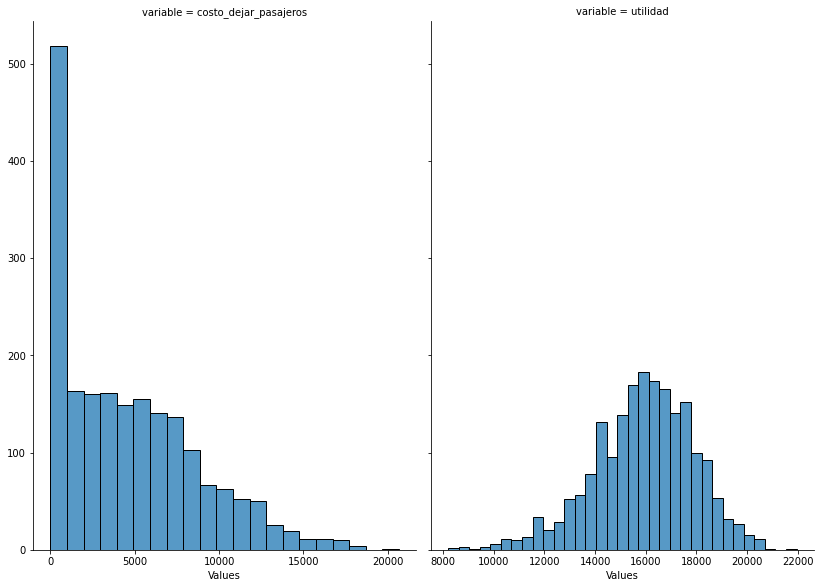

In [10]:
s1.histogram()

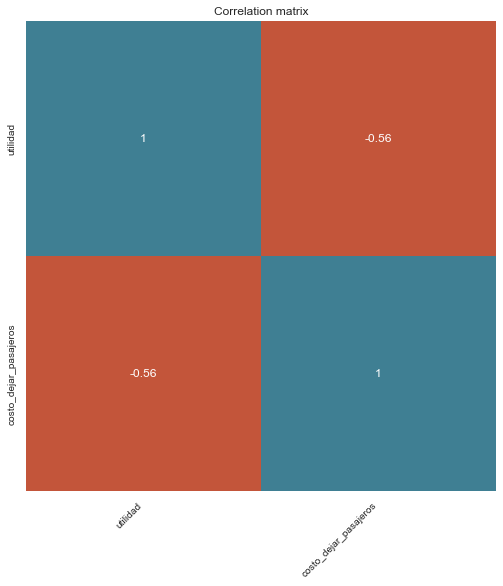

In [11]:
s1.plot_matrix(plot_type='corr_plot',columns=False,method='pearson')

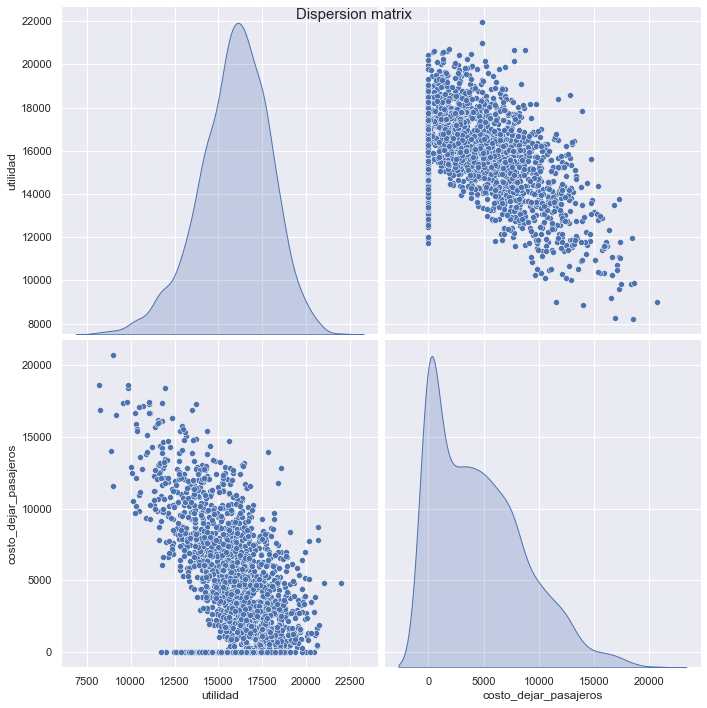

In [12]:
s1.plot_matrix(plot_type='pairplot',columns=False,method='pearson')